| Step | Description                                                        | Status              |
| ---- | ------------------------------------------------------------------ | ------------------- |
| 1    | Loaded the correct dataset of only depressed participants          | ✅                   |
| 2    | Selected emotional features most indicative of anxiety             | ✅                   |
| 3    | Normalized them using `MinMaxScaler()`                             | ✅                   |
| 4    | Averaged them into `anxiety_score`                                 | ✅                   |
| 5    | Used a **percentile threshold (40th)** to label top 60% as anxious | ✅ **(💯 key step)** |
| 6    | Saved the updated file for modeling                                | ✅                   |


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook settings
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv("../EDA/depressed_with_anxiety_labels.csv")

# Quick shape & preview
print("Shape of Data:", df.shape)
df.head()

Shape of Data: (40, 404)


,participant_id,sadness,anger,joy,fear,nervousness,affection,negative_emotion,positive_emotion,confusion,...,embed_378,embed_379,embed_380,embed_381,embed_382,embed_383,phq8_score,phq8_binary,anxiety_score,anxiety_binary
0,308_TRANSCRIPT,0.591801,0.213048,0.001125,0.118360,0.519310,0.002250,0.451185,0.006749,0.153206,...,-0.020888,-0.005703,-0.004676,0.019968,-0.066287,-0.020669,22,1,0.341152,1
1,309_TRANSCRIPT,0.754822,0.271736,0.000000,0.150964,0.264945,0.001435,0.555420,0.012912,0.195409,...,-0.111993,0.017624,0.018996,0.025255,0.018172,-0.036503,15,1,0.365549,1
2,311_TRANSCRIPT,0.327285,0.000000,0.000000,0.000000,0.000000,0.000000,0.357889,0.001555,0.000000,...,0.007027,-0.011035,0.060791,0.130841,-0.038660,0.006578,21,1,0.114196,0
3,319_TRANSCRIPT,0.154511,0.000000,0.001468,0.154511,0.542340,0.001468,0.189647,0.007342,1.000000,...,-0.053243,0.035062,0.060516,0.077625,-0.101533,0.031449,13,1,0.340168,1
4,320_TRANSCRIPT,0.417549,0.250529,0.002646,0.556731,0.732804,0.003968,0.676207,0.013228,0.180159,...,0.004624,0.045622,0.083397,0.074724,-0.062993,-0.033380,11,1,0.468997,1


In [7]:
# Check for nulls
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 participant_id    0
sadness           0
anger             0
joy               0
fear              0
                 ..
embed_383         0
phq8_score        0
phq8_binary       0
anxiety_score     0
anxiety_binary    0
Length: 404, dtype: int64


In [8]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Columns: 404 entries, participant_id to anxiety_binary
dtypes: float64(400), int64(3), object(1)
memory usage: 126.4+ KB


In [9]:
# Describe key scores
print("\nAnxiety Score Description:\n", df['anxiety_score'].describe())


Anxiety Score Description:
 count    40.000000
mean      0.275248
std       0.141526
min       0.021046
25%       0.161898
50%       0.282040
75%       0.359586
max       0.829168
Name: anxiety_score, dtype: float64


In [10]:
df['anxiety_binary'].value_counts()

anxiety_binary
1    24
0    16
Name: count, dtype: int64

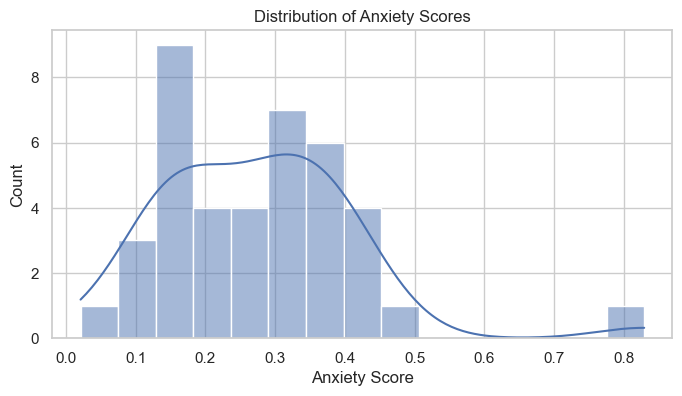

In [11]:
# Step 2: Histogram of anxiety scores
plt.figure(figsize=(8, 4))
sns.histplot(df['anxiety_score'], kde=True, bins=15)
plt.title("Distribution of Anxiety Scores")
plt.xlabel("Anxiety Score")
plt.ylabel("Count")
plt.show()

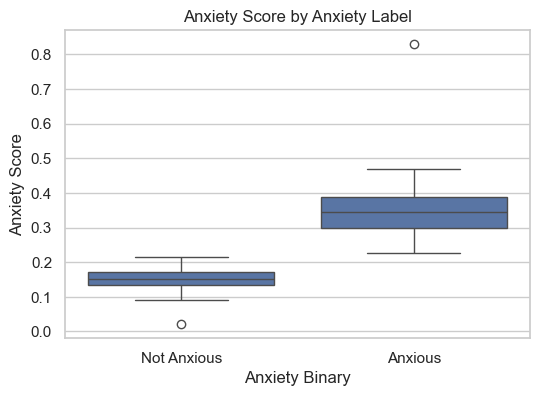

In [12]:
# Step 3: Boxplot of anxiety score by binary label
plt.figure(figsize=(6, 4))
sns.boxplot(x='anxiety_binary', y='anxiety_score', data=df)
plt.title("Anxiety Score by Anxiety Label")
plt.xlabel("Anxiety Binary")
plt.ylabel("Anxiety Score")
plt.xticks([0, 1], ['Not Anxious', 'Anxious'])
plt.show()

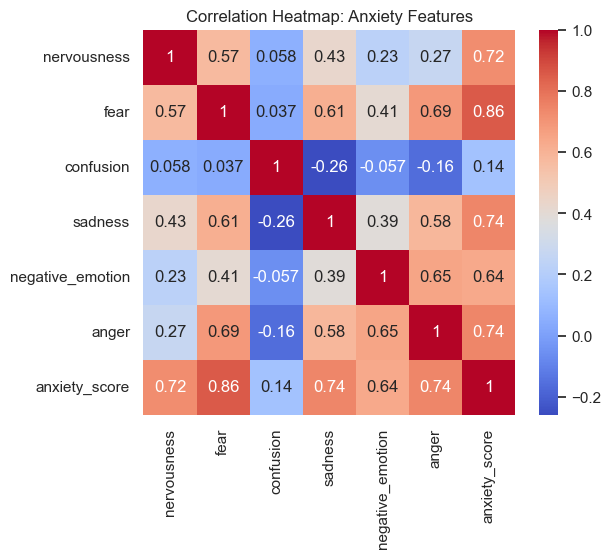

In [13]:
# Step 4: Correlation matrix for anxiety features
anxiety_features = ['nervousness', 'fear', 'confusion', 'sadness', 'negative_emotion', 'anger']
plt.figure(figsize=(6, 5))
sns.heatmap(df[anxiety_features + ['anxiety_score']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Anxiety Features")
plt.show()

In [14]:
variances = df[anxiety_features].var()
print("\nFeature Variance:\n", variances.sort_values(ascending=False))


Feature Variance:
 nervousness         0.080544
sadness             0.068253
fear                0.040419
confusion           0.040316
negative_emotion    0.036975
anger               0.029678
dtype: float64
